# Car Price Prediction using Neural Networks (with TensorFlow).

**Objective:**

The objective of this machine learning project is to determine the price of a second hand car, based on its other attributes such as its current price, demand, year of purchase, odometer readung, etc. This would be a regression problem wherein the output value will be a continuos quantity i.e. price of the car.

The following flow chart describes the steps taken in order to accomplish this project:

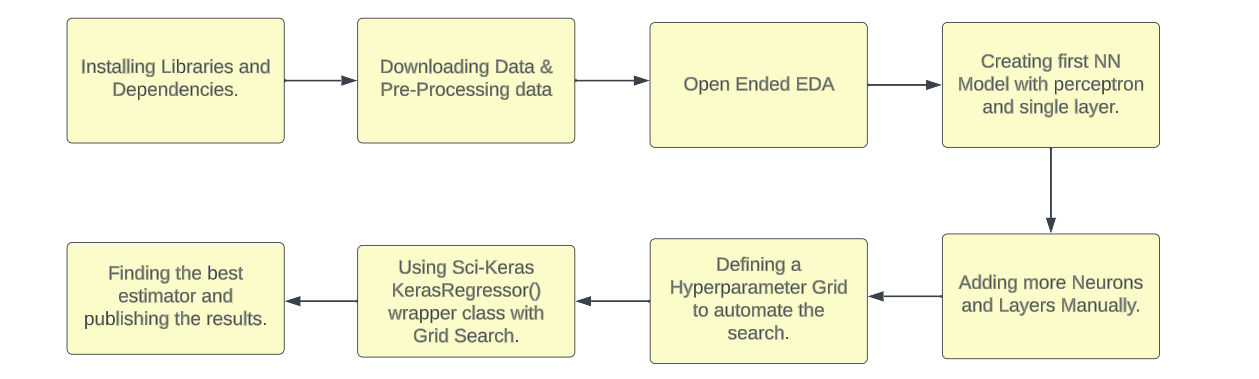

## Downloading and installing required Libraries

- Tensorflow: for building Neural networks.
- Pandas: for data handling.
- seaborn: for data visualization.
- Opendatasets: for downloading the file from Kaggle.

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam,

!pip install opendatasets -q
import opendatasets as od

## Data Preperation

The data set chosen for this project is from kaggle:

https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression

Downloading the dataset using opendatasets.

In [2]:
 od.download('https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression/download?datasetVersionNumber=1')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sarthaksrivastava123
Your Kaggle Key: ··········


100%|██████████| 24.3k/24.3k [00:00<00:00, 25.9MB/s]

In [3]:
#Reading the data using Pandas

data = pd.read_csv('/content/second-hand-used-cars-data-set-linear-regression/train.csv')

### Open-ended Exploratory Data Analysis

Exploring the dataset, to determine the useful columns.



In [4]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [6]:
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


<Axes: >

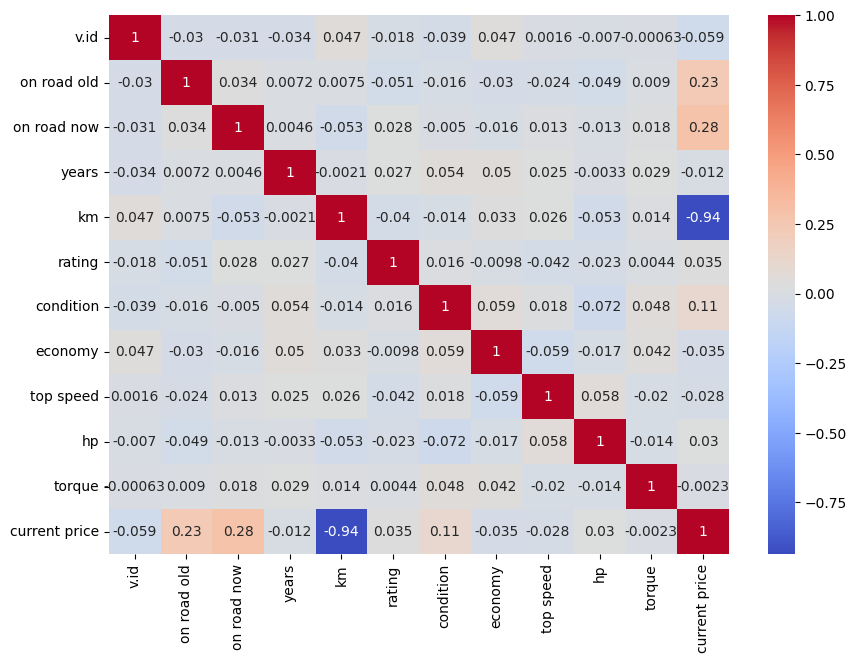

In [7]:
corelation = data.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corelation, annot=True, cmap="coolwarm")

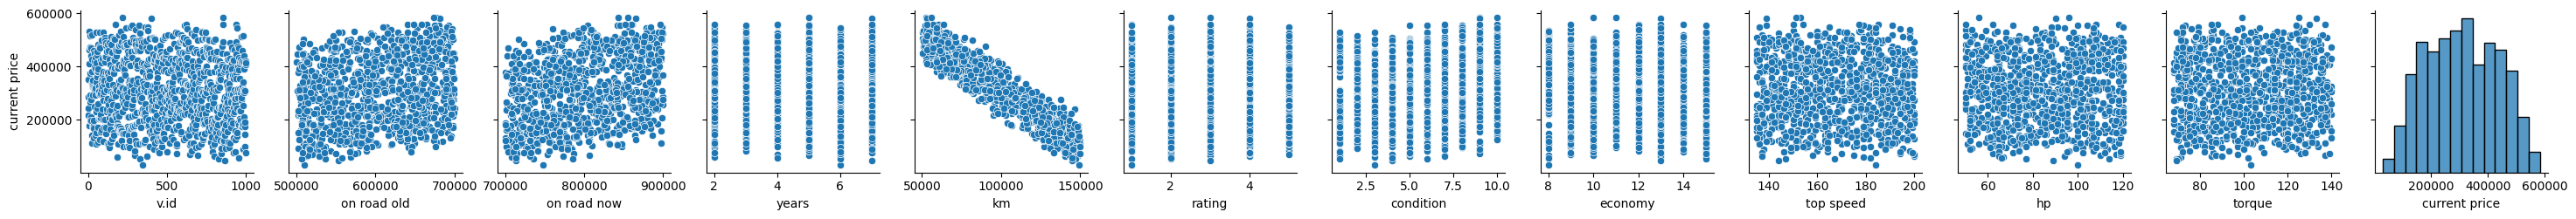

In [8]:
sns.pairplot(data=data, y_vars=['current price'])

Depending on the number of column we would be utilizing the shape of our tensors would be like:

Input shape: (n,8) [n number of rows and 8 columns/features]

Output shape: (n,1) [n number of rows and 1 column i.e price]

### Converting Pandas dataframe into Tensor:


In [9]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32) #Originally float64 but casted to save memory.
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [10]:
#Performing a random shuffle
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[4.880000e+02 5.435870e+05 8.112450e+05 ... 1.000000e+02 1.120000e+02
  3.883760e+05]
 [3.520000e+02 6.814320e+05 8.827150e+05 ... 6.500000e+01 7.000000e+01
  4.104035e+05]
 [9.920000e+02 5.935440e+05 8.443330e+05 ... 5.400000e+01 7.000000e+01
  1.458805e+05]
 ...
 [5.390000e+02 5.032550e+05 7.425730e+05 ... 6.100000e+01 8.000000e+01
  1.260705e+05]
 [1.910000e+02 6.849830e+05 7.178590e+05 ... 8.400000e+01 1.290000e+02
  1.679785e+05]
 [2.760000e+02 5.873270e+05 7.804730e+05 ... 6.000000e+01 1.040000e+02
  2.125535e+05]], shape=(1000, 12), dtype=float32)


In [11]:
#Input Data/Columns/Features
#Ignoring the index column as it is irrelevant.

x = tensor_data[:,1:-1]
print(x[:5])

#Output Column.
y = tensor_data[:,-1]
print(y[:5])

tf.Tensor(
[[5.43587e+05 8.11245e+05 3.00000e+00 7.27140e+04 5.00000e+00 3.00000e+00
  1.20000e+01 1.51000e+02 1.00000e+02 1.12000e+02]
 [6.81432e+05 8.82715e+05 4.00000e+00 1.00348e+05 4.00000e+00 9.00000e+00
  9.00000e+00 1.79000e+02 6.50000e+01 7.00000e+01]
 [5.93544e+05 8.44333e+05 2.00000e+00 1.44322e+05 3.00000e+00 6.00000e+00
  1.30000e+01 1.80000e+02 5.40000e+01 7.00000e+01]
 [5.96157e+05 8.07829e+05 3.00000e+00 1.23556e+05 4.00000e+00 9.00000e+00
  1.50000e+01 1.62000e+02 7.40000e+01 7.90000e+01]
 [6.96024e+05 8.37602e+05 4.00000e+00 8.64880e+04 1.00000e+00 2.00000e+00
  1.20000e+01 1.60000e+02 1.05000e+02 1.22000e+02]], shape=(5, 10), dtype=float32)
tf.Tensor([388376.  410403.5 145880.5 237954.  420631. ], shape=(5,), dtype=float32)


### Spliting Data into Test and Train set.
Since the data is already shuffled, we are taking the first 800 rows for traing and the last 200 rows for the test set.

In [12]:
x_train , y_train = x[0:800] , y[0:800]
x_test, y_test = x[800:], y[800:]

In [13]:
print(x_test[:1])

tf.Tensor(
[[5.87187e+05 7.77397e+05 3.00000e+00 1.09589e+05 2.00000e+00 3.00000e+00
  1.40000e+01 1.64000e+02 9.30000e+01 1.01000e+02]], shape=(1, 10), dtype=float32)


### Normalizing the values.

Normalizing means: (value - mean)/ std. deviation

In [14]:
normalizer_train = Normalization()
#Sets the mean value and other attributes automatically.
normalizer_train.adapt(x_train)
normalizer_train(x)[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[-0.9813767 ,  0.20717557, -0.9357723 , -0.9185252 ,  1.4133363 ,
        -0.9134379 ,  0.16269103, -0.82490873,  0.7789822 ,  0.40994117],
       [ 1.3832593 ,  1.4659259 , -0.35364285,  0.0260463 ,  0.70755035,
         1.2149613 , -1.1790925 ,  0.63257146, -0.9383227 , -1.5929717 ],
       [-0.12439878,  0.789931  , -1.5179017 ,  1.5291435 ,  0.00176451,
         0.15076168,  0.6099522 ,  0.6846243 , -1.4780471 , -1.5929717 ],
       [-0.07957456,  0.14701198, -0.9357723 ,  0.8193305 ,  0.70755035,
         1.2149613 ,  1.5044746 , -0.25232723, -0.49673003, -1.163776  ],
       [ 1.6335751 ,  0.67138267, -0.35364285, -0.44770926, -1.4098072 ,
        -1.2681711 ,  0.16269103, -0.35643297,  1.0243115 ,  0.8868252 ]],
      dtype=float32)>

## Creating a baseline Tensorflow Model

There are three ways to create a TF model. They are:
1. Sequential API
2. Functional API
3. Subclassing method

We would be using Sequential API method using keras in this example. There is no said rule for having number of neurons or layers in a deep learning model, hence we start with the very basic and grow the model as per the requirement.

#### A model having a perceptron (single neuron)


In [15]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (10,))) #If we define input_shape = (32,8) it means mini batch of 32.
model.add(normalizer_train)
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 32 (132.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 21 (88.00 Byte)
_________________________________________________________________


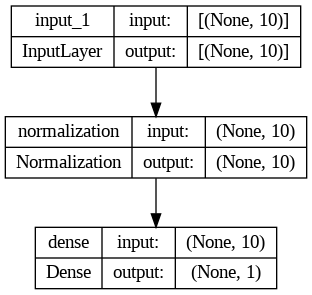

In [16]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [17]:
model.compile(optimizer= Adam(),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [18]:
model.fit(x,y, epochs = 128, verbose = 0)

Testing Models Performance

In [19]:
#Preprocessing all the same things for x_test

normalizer_test = Normalization()
normalizer_test.adapt(x_train) #Sets the mean value and other attributes automatically.
normalizer_test(x)[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[-0.9813767 ,  0.20717557, -0.9357723 , -0.9185252 ,  1.4133363 ,
        -0.9134379 ,  0.16269103, -0.82490873,  0.7789822 ,  0.40994117],
       [ 1.3832593 ,  1.4659259 , -0.35364285,  0.0260463 ,  0.70755035,
         1.2149613 , -1.1790925 ,  0.63257146, -0.9383227 , -1.5929717 ],
       [-0.12439878,  0.789931  , -1.5179017 ,  1.5291435 ,  0.00176451,
         0.15076168,  0.6099522 ,  0.6846243 , -1.4780471 , -1.5929717 ],
       [-0.07957456,  0.14701198, -0.9357723 ,  0.8193305 ,  0.70755035,
         1.2149613 ,  1.5044746 , -0.25232723, -0.49673003, -1.163776  ],
       [ 1.6335751 ,  0.67138267, -0.35364285, -0.44770926, -1.4098072 ,
        -1.2681711 ,  0.16269103, -0.35643297,  1.0243115 ,  0.8868252 ]],
      dtype=float32)>

In [20]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [21]:
loss, rmse = model.evaluate(x_test, y_test)
print('Loss (MAE) is {}'.format(loss))
print('RMSE is {}'.format(rmse))

7/7 [==============================] - 0s 7ms/step - loss: 299154.1875 - root_mean_squared_error: 324493.5938
Loss (MAE) is 299154.1875
RMSE is 324493.59375


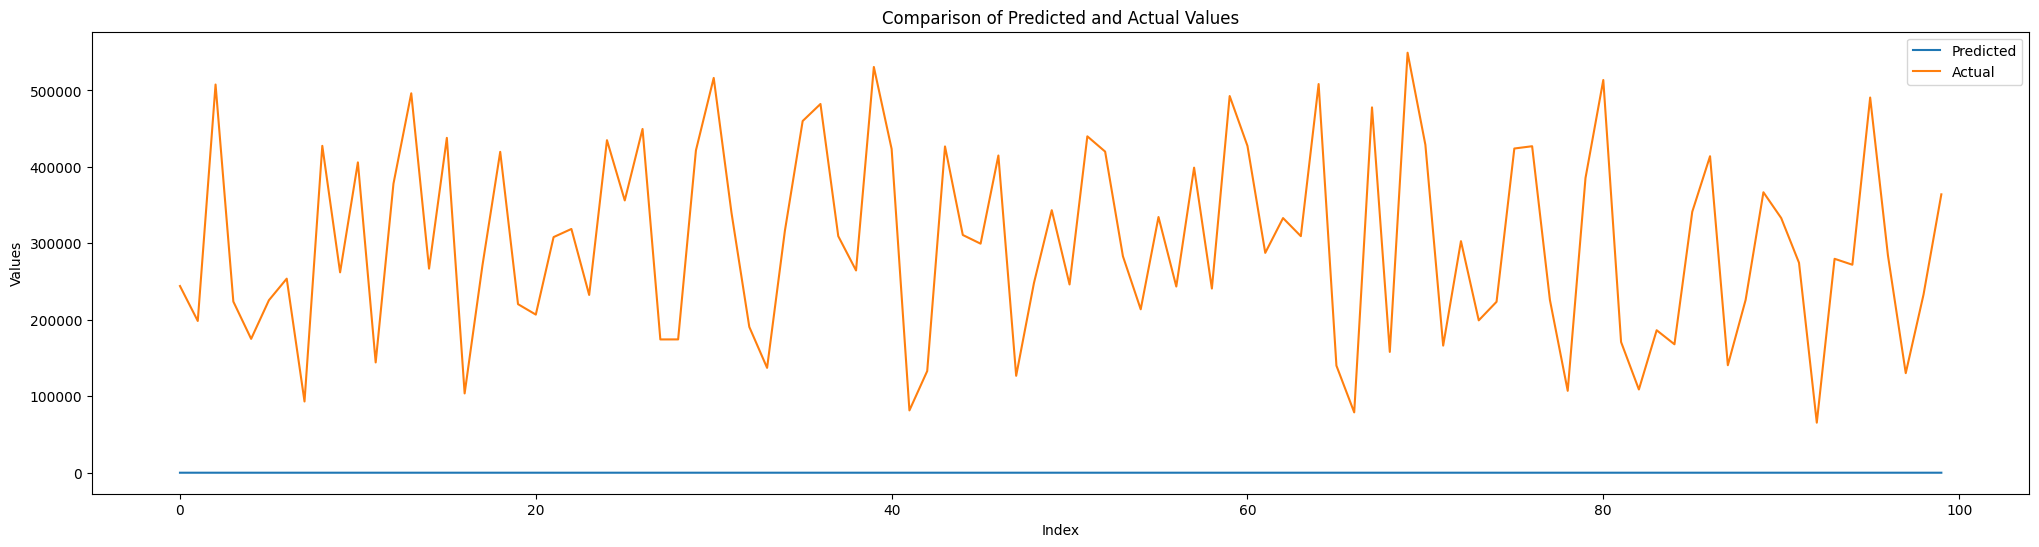

In [22]:
# Ploting some predicted vs actual values from the test dataset to give us an idea of model performance

plt.figure(figsize=(25, 6))
plt.plot(y_pred[0:100], label='Predicted')
plt.plot(y_test[0:100], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

#### Incresing the number of neurons in the first layter to 10.

In [23]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (10,)))
model.add(normalizer_train)
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 142 (572.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 21 (88.00 Byte)
_________________________________________________________________


The non-trainable params are the weights of the Normalization layer, these weights will not be altered during the training process.

We have total trainable params equal to 121. i.e.

each neuron from first layer x 10 weights to seccond layer. Therefor total weights = 10 x 10 =100.

Each neuron in the seccond layer will have a bias therefore 10 biases.  

The seccond layer is connected to last one neuron, this will have 10 more weihts plus one more bias i.e. 11

Which makes the total =  110 + 11 = 121.

In [24]:
model.compile(optimizer= Adam(),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [25]:
model.fit(x,y, epochs = 128, verbose = 0)

In [26]:
y_pred = model.predict(x_test)
loss, rmse = model.evaluate(x_test, y_test)
print('Loss (MAE) is {}'.format(loss))
print('RMSE is {}'.format(rmse))

7/7 [==============================] - 0s 4ms/step - loss: 298797.5938 - root_mean_squared_error: 324162.7188
Loss (MAE) is 298797.59375
RMSE is 324162.71875


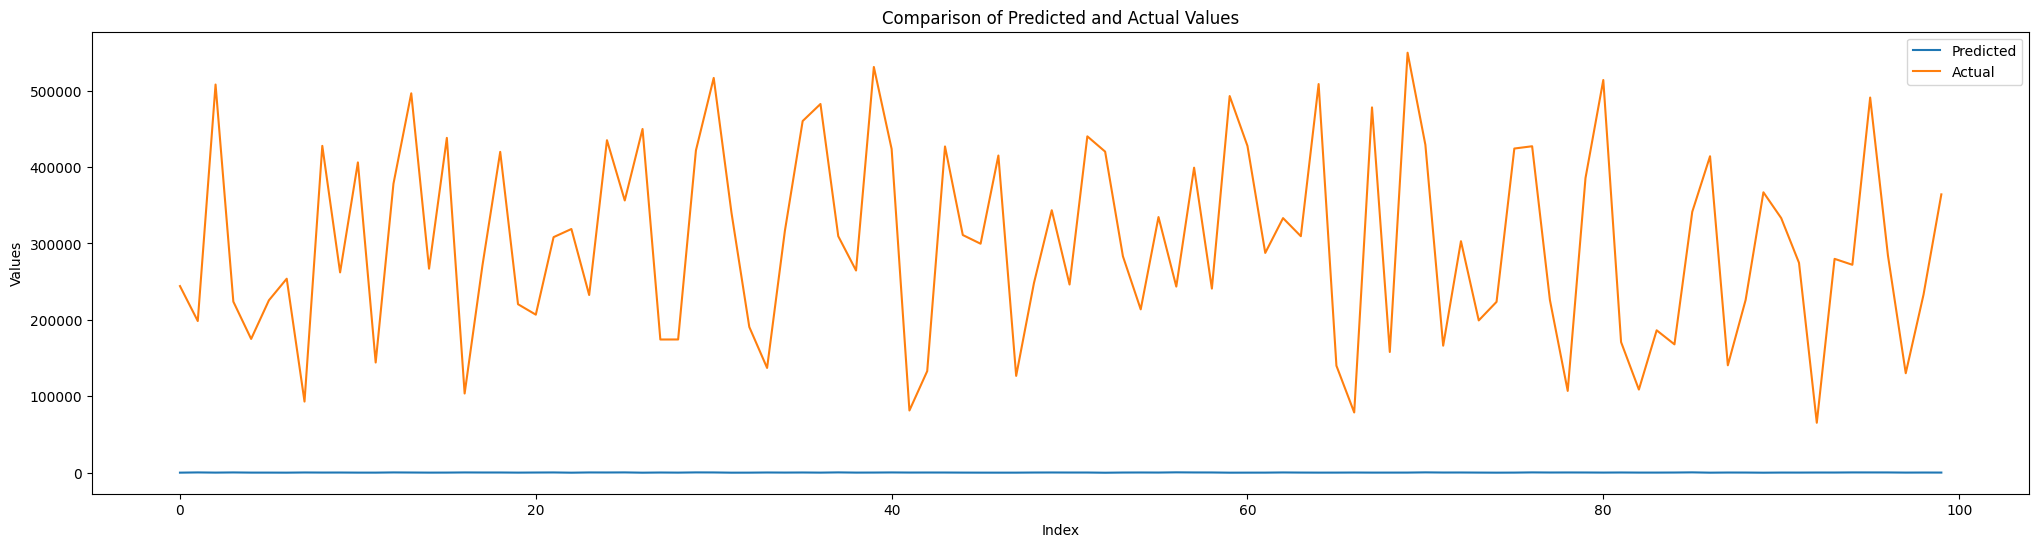

In [27]:
# Ploting some predicted vs actual values from the test dataset to give us an idea of model performance

plt.figure(figsize=(25, 6))
plt.plot(y_pred[0:100], label='Predicted')
plt.plot(y_test[0:100], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

#### Adding one more hidden layer with 10 neurons

In [28]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (10,)))
model.add(normalizer_train)
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 252 (1012.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 21 (88.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer= Adam(),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

model.fit(x,y, epochs = 128, verbose = 0)

y_pred = model.predict(x_test)

loss, rmse = model.evaluate(x_test, y_test)
print('Loss (MAE) is {}'.format(loss))
print('RMSE is {}'.format(rmse))

7/7 [==============================] - 0s 4ms/step - loss: 264159.6250 - root_mean_squared_error: 291720.3125
Loss (MAE) is 264159.625
RMSE is 291720.3125


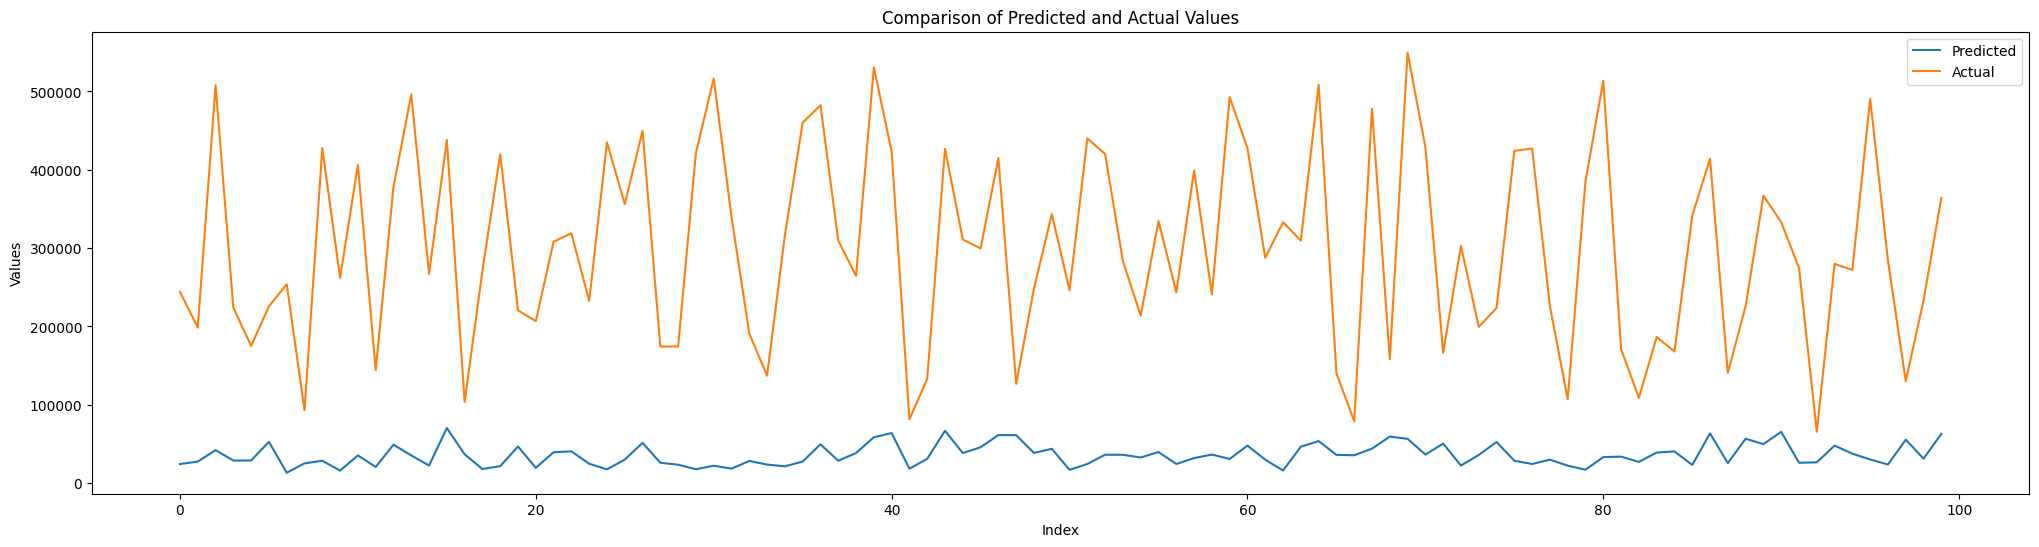

In [30]:
# Ploting some predicted vs actual values from the test dataset to give us an idea of model performance

plt.figure(figsize=(25, 6))
plt.plot(y_pred[0:100], label='Predicted')
plt.plot(y_test[0:100], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

#### Adding one more hidden layer

In [31]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (10,)))
model.add(normalizer_train)
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 362 (1.42 KB)
Trainable params: 341 (1.33 KB)
Non-trainable params: 21 (88.00 Byte)
______________________

In [32]:
model.compile(optimizer= Adam(),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

model.fit(x,y, epochs = 128, verbose = 0)

y_pred = model.predict(x_test)

loss, rmse = model.evaluate(x_test, y_test)
print('Loss (MAE) is {}'.format(loss))
print('RMSE is {}'.format(rmse))

7/7 [==============================] - 0s 3ms/step - loss: 26614.5820 - root_mean_squared_error: 35545.8555
Loss (MAE) is 26614.58203125
RMSE is 35545.85546875


Currently the model looks like this:

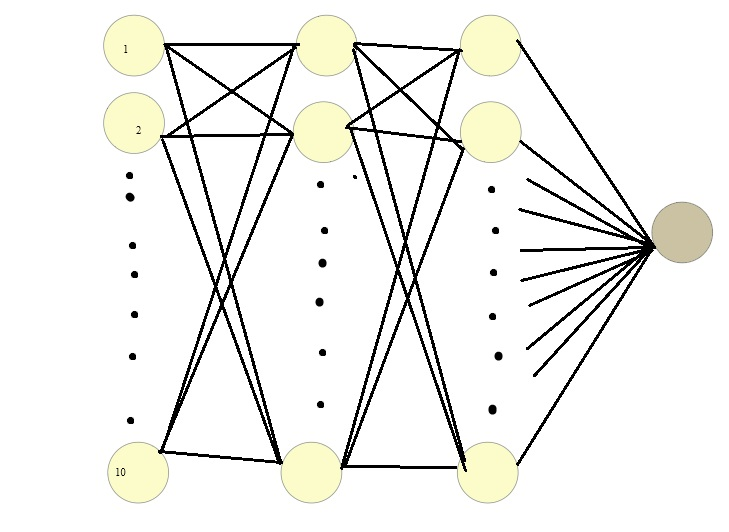

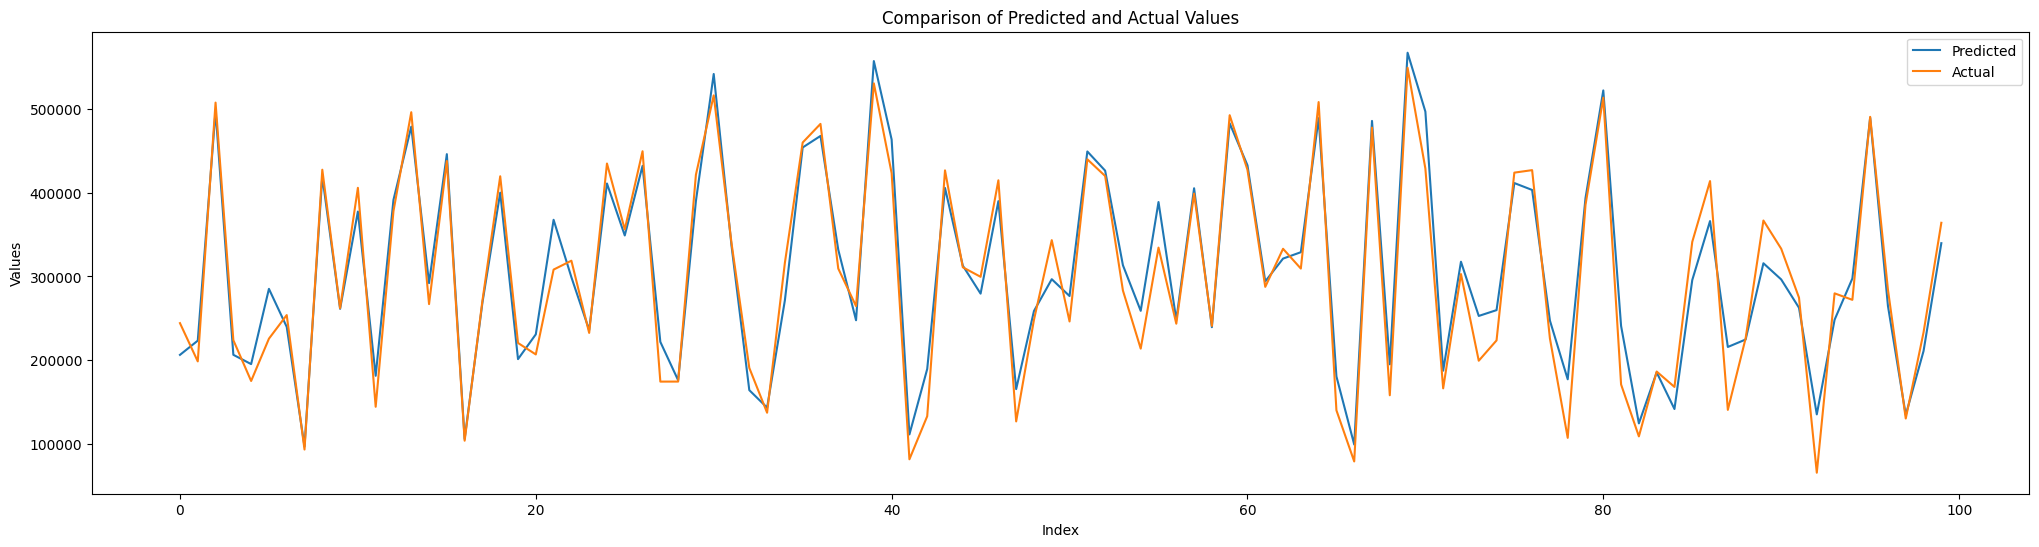

In [33]:
# Ploting some predicted vs actual values from the test dataset to give us an idea of model performance

plt.figure(figsize=(25, 6))
plt.plot(y_pred[0:100], label='Predicted')
plt.plot(y_test[0:100], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

#### Increasing Neurons in Each Hidden Layer.

In [34]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (10,)))
model.add(normalizer_train)
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(optimizer= Adam(),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

model.fit(x,y, epochs = 128, verbose = 0)

y_pred = model.predict(x_test)

loss, rmse = model.evaluate(x_test, y_test)
print('Loss (MAE) is {}'.format(loss))
print('RMSE is {}'.format(rmse))

7/7 [==============================] - 0s 2ms/step - loss: 15519.1689 - root_mean_squared_error: 20271.4590
Loss (MAE) is 15519.1689453125
RMSE is 20271.458984375


**There is a significant improvement in the loss function.**

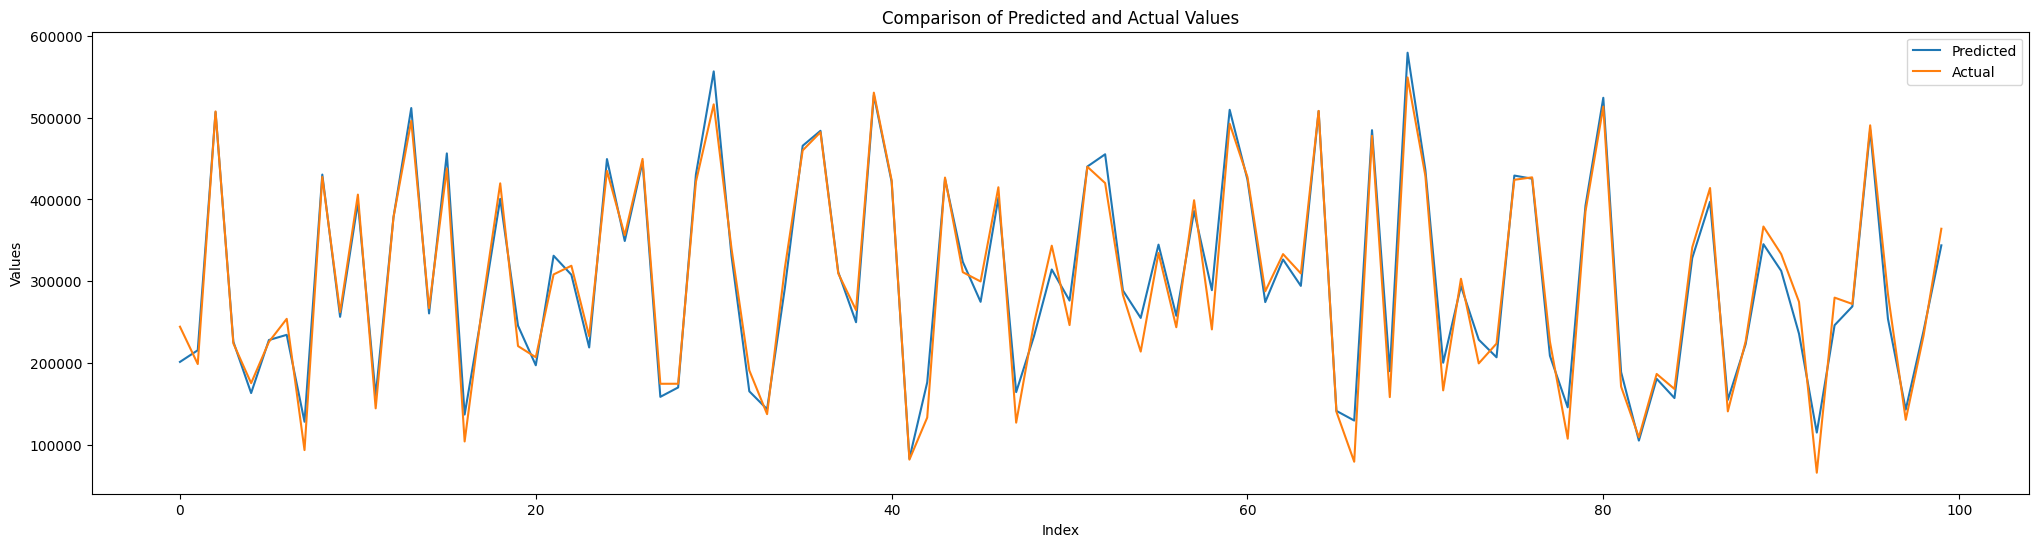

In [35]:
# Ploting some predicted vs actual values from the test dataset to give us an idea of model performance

plt.figure(figsize=(25, 6))
plt.plot(y_pred[0:100], label='Predicted')
plt.plot(y_test[0:100], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

#### Adding one more hidden layer with 20 neurons.

In [36]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (10,)))
model.add(normalizer_train)
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(optimizer= Adam(),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

model.fit(x,y, epochs = 128, verbose = 0)

y_pred = model.predict(x_test)

loss, rmse = model.evaluate(x_test, y_test)
print('Loss (MAE) is {}'.format(loss))
print('RMSE is {}'.format(rmse))

7/7 [==============================] - 0s 2ms/step - loss: 11076.7871 - root_mean_squared_error: 14879.8037
Loss (MAE) is 11076.787109375
RMSE is 14879.8037109375


#### Increasing number of neurons in the first layer and the seccond layer

In [37]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (10,)))
model.add(normalizer_train)
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer= Adam(),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

model.fit(x,y, epochs = 128, verbose = 0)

y_pred = model.predict(x_test)

loss, rmse = model.evaluate(x_test, y_test)
print('Loss (MAE) is {}'.format(loss))
print('RMSE is {}'.format(rmse))

7/7 [==============================] - 0s 5ms/step - loss: 7358.9111 - root_mean_squared_error: 10078.1309
Loss (MAE) is 7358.9111328125
RMSE is 10078.130859375


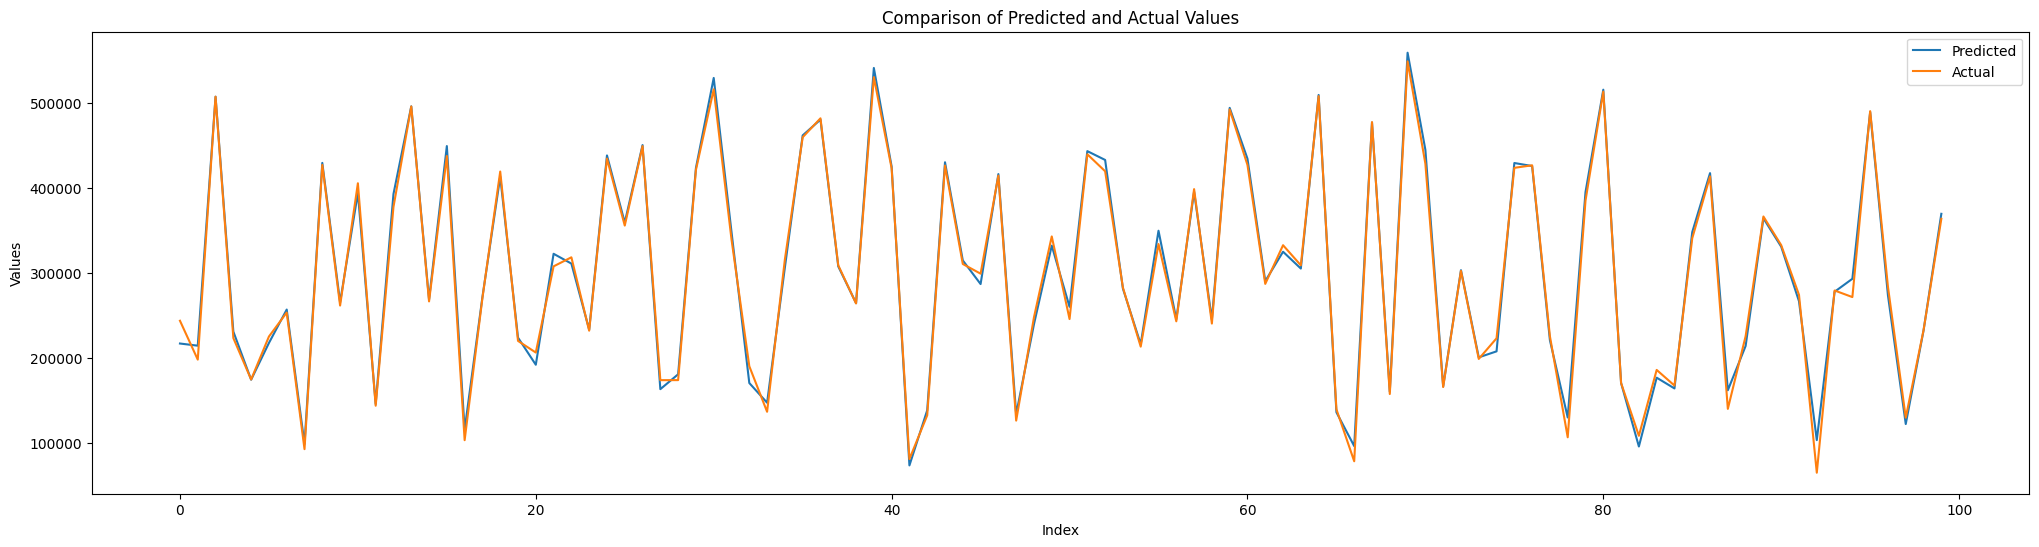

In [38]:
# Ploting some predicted vs actual values from the test dataset to give us an idea of model performance

plt.figure(figsize=(25, 6))
plt.plot(y_pred[0:100], label='Predicted')
plt.plot(y_test[0:100], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

**With this we have realised that increasing neurons per layers or adding completely new hidden layers is so far improving the performance.**

**In the next section we will utilize a more complex approach using keras classifier and gridsearchCV**

## Using KearasClassifier and GridSearchCV

Every ML model require hyperparamter tunning, as to achieve its best performance. In this secion we will try to find the best suited hyperparameters which give us the best performance by finding the optimal number of layers/neurons and optimizing Hyperparameters such as best loss function, optimizer and activation function.

Sadly, there is no inbuilt Gridsearch functionality for tensorflow models, hence we have to use a wrapper class from the SciKeras Library in order to use GridSearchCV with our TF model.

#### Finding the optimal number of layers/neurons and optimizing Hyperparameters.

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

This module is discontinued, hence using the latest scikeras module.

In [39]:
!pip install scikeras -q
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

In [104]:
def create_model(hidden_layer_sizes):

  model = tf.keras.Sequential()
  model.add(InputLayer(input_shape = (10,)))
  model.add(normalizer_train)

  for nodes in hidden_layer_sizes:
    model.add(Dense(nodes, activation="relu"))

  model.add(Dense(1))

  return model

In [106]:
#reg is an KerasRegressor object which will be used as estimator in the grid search. Here this can be used to compile the model as well.
# The KerasRegressor can take paramas such as optimizer, loss and metrics, if we dont define it manually it switches to default values.
# However, if we have some inputs/arguments to create model such as hidden_layer-sizes in this case, we HAVE to define them here.

reg = KerasRegressor(
    model=create_model,
    hidden_layer_sizes=[10],
    verbose = 1,
)

In [107]:
params_grid = { 'hidden_layer_sizes': [(40,30,20,10), (40, 40, 40, 40), (80, 60, 40, 20), (80, 80, 80, 80)],
               'optimizer': ['rmsprop','Adam'],
                'loss': ['huber', 'mse'],
                'metrics' : ['mae','mse'],
                'epochs' : [128,256]
}

In [108]:
%%time

gs = GridSearchCV(estimator=reg, param_grid = params_grid, verbose=True)
gs.fit(data.iloc[0:800, 1:-1], data.iloc[0:800, -1])

Streaming output truncated to the last 5000 lines.
Epoch 66/256
20/20 [==============================] - 0s 3ms/step - loss: 262772736.0000 - mean_squared_error: 262772736.0000
Epoch 67/256
20/20 [==============================] - 0s 3ms/step - loss: 252752288.0000 - mean_squared_error: 252752288.0000
Epoch 68/256
20/20 [==============================] - 0s 3ms/step - loss: 250824288.0000 - mean_squared_error: 250824288.0000
Epoch 69/256
20/20 [==============================] - 0s 3ms/step - loss: 246258592.0000 - mean_squared_error: 246258592.0000
Epoch 70/256
20/20 [==============================] - 0s 3ms/step - loss: 242765776.0000 - mean_squared_error: 242765776.0000
Epoch 71/256
20/20 [==============================] - 0s 3ms/step - loss: 234982400.0000 - mean_squared_error: 234982400.0000
Epoch 72/256
20/20 [==============================] - 0s 3ms/step - loss: 239419552.0000 - mean_squared_error: 239419552.0000
Epoch 73/256
20/20 [==============================] - 0s 3ms/step -

GridSearchCV(estimator=KerasRegressor(hidden_layer_sizes=[10], model=<function create_model at 0x7e21671a3130>),
             param_grid={'epochs': [128, 256],
                         'hidden_layer_sizes': [(40, 30, 20, 10),
                                                (40, 40, 40, 40),
                                                (80, 60, 40, 20),
                                                (80, 80, 80, 80)],
                         'loss': ['huber', 'mse'], 'metrics': ['mae', 'mse'],
                         'optimizer': ['rmsprop', 'Adam']},
             verbose=True)

**The SciKeras does not accepts tensors as input due to backward compability issue, hence we have input data as Pandas dataframe or Numpy. In this case I have taken the Pandas dataframe which was downloaded from the Source.**

In [114]:
print(gs.best_score_, gs.best_params_)

0.9981546697696106 {'epochs': 256, 'hidden_layer_sizes': (80, 80, 80, 80), 'loss': 'mse', 'metrics': 'mse', 'optimizer': 'rmsprop'}


In [116]:
y_pred = gs.predict(data.iloc[800:900, 1:-1])

4/4 [==============================] - 0s 3ms/step


In [124]:
y_test = data.iloc[800:900,-1].values

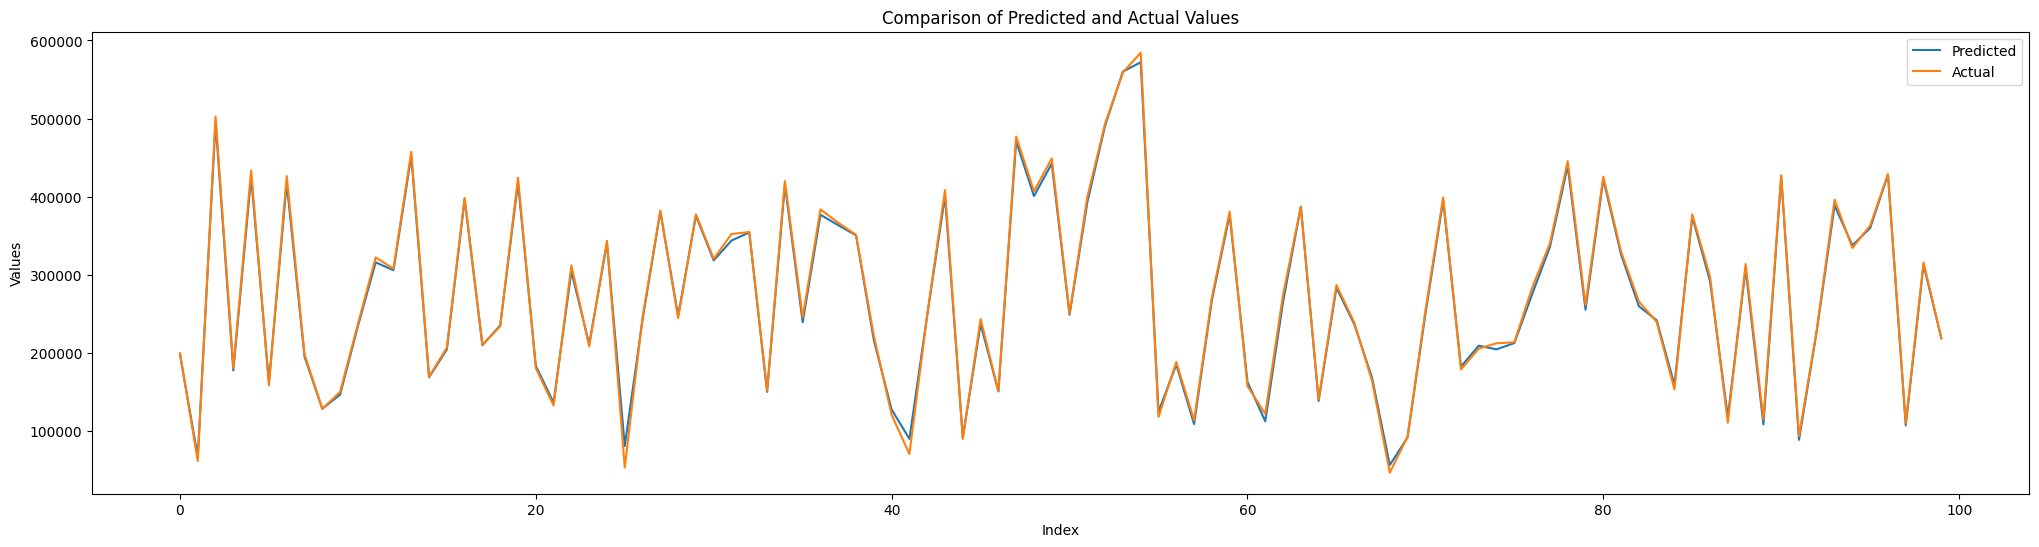

In [126]:

# Ploting some predicted vs actual values from the best model as per GridsearchCV.

plt.figure(figsize=(25, 6))
plt.plot(y_pred[0:100], label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()

## Results and Conclusion:

- The best machine learning model created had the following paramters/hyper-paramerters:

  - epochs: 256
  - hidden_layer_sizes: (80, 80, 80, 80)
  - loss function: mse
  - metrics: mean squared error
  - best optimizer: rmsprop

- The R^2 score achieved was: 0.9981
- In general seems like more layers help the model perform better, however there is a saturation point to this.


## References and Future Work
 -  DataSet from Kaggle can be found [here](https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression)
 - Tensorflow and Keras official [Documentation](https://www.tensorflow.org/api_docs/python/tf)]
 - SciKeras Wrapper Class [Documentation](https://adriangb.com/scikeras/stable)
 - Matplotlib and Ploty [Documentation](https://matplotlib.org/)

 Future Work:
 - Create a more robust model with more layers and neurons at the same time keeping in check the overfitting.
 - Try model's performance on data from any indian car website such as cardekho.com etc.
 - Compare the feature importances wrt to India and US i.e. what are the things people lookout for while buying a seccond hand car, what is the difference in the preferences of these factors.  